In [39]:
import pandas as pd
import numpy as np
import seaborn as sb

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree

In [40]:
#Read and load the data


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [41]:
#Combining both train and test data sets into one
#Combining them into a dataframe ‘data’ with a ‘source’ column specifying where each observation belongs
#pd.concat concatenates (zlúčiť) objects together, lear the existing index and reset it in the result by setting the ignore_index option to True


train['source']='train'
test['source']='test'
data = pd.concat([train,test],ignore_index = True, sort = True)
print (train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [42]:
#For checking which columns contain missing values
#data.apply - apply a function
#lambda expression = anonymous function
#The sum() function adds the items of an iterable and returns the sum
#isnull - detect missing values


data.apply(lambda x: sum(x.isnull())) #or: data.isnull().sum(axis=0)


#Item_Outlet_Sales is the target variable and missing values are ones in the test set

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [43]:
data.head(20)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,train
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1,train
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,NaN,Supermarket Type1,train
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,NaN,Supermarket Type1,train


In [44]:
data.describe()

#Some observations:
    #Item_Visibility has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0
    #Outlet_Establishment_Years vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales
    #The lower ‘count’ of Item_Weight and Item_Outlet_Sales confirms the findings from the missing value check

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [45]:
#Number of unique values
#The len() function returns the number of items (length) of an object
#x.unique - Find the unique elements of an array.


data.apply(lambda x: len(x.unique()))

#1559 products and 10 outlets/stores

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

In [46]:
#Filter categorical variables
#Create an empty list named categorical_columns
#x for x in y if.. - for each x in data types index (zoznam), if data type is object, add it to the list
#types of data - http://pbpython.com/pandas_dtypes.html

categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']



#Exclude ID columns and source:

categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]



#Print frequency of categories
#\n prints to the new line
#%s is used as a placeholder for string values you want to inject into a formatted string
#value_counts - Returns object containing counts of unique values

for col in categorical_columns:
    print ('\nFrequency of Categories for variable %s'%col)
    print (data[col].value_counts())
    
    
    
#Output gives us following observations:
    #Item_Fat_Content: Regular = reg, Low Fat = LF, low fat
    #Item_Type: Not all categories have substantial (podstatné) numbers
    #Outlet_Type: Supermarket Type2 and Type3 can be combined. But we should check if that’s a good idea before doing it


Frequency of Categories for variable Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for variable Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency of Categories for variable Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int6

In [47]:
#Data cleaning
#Imputing missing values

In [48]:
#Determine the average weight per item:
#.mean - gives mean value of list
#skipna - exclude NaN and null values

item_avg_weight = data['Item_Weight'].mean (axis = 0, skipna = True)



#Get a boolean variable specifying missing Item_Weight values
#isnull - detect missing values

miss_bool = data['Item_Weight'].isnull() 



#Impute data and check #missing values before and after imputation to confirm
#%d is used as a placeholder for numeric or decimal values.
#.fillna - fill missing values with other value, specified in ()
#inplace = True - to replace the values in the same data set

print ('Orignal #missing: %d' % sum(miss_bool))

data['Item_Weight'].fillna(item_avg_weight, inplace = True)

print ('Final #missing: %d'% sum(data['Item_Weight'].isnull()))

Orignal #missing: 2439
Final #missing: 0


In [49]:
#Import mode function:
#mode function = The mode of a set of data values is the value that appears most often

from scipy.stats import mode



#Determing the mode for each
#pivot_table - creates pivot table (values - columns to aggregate (zhromazdit), columns - keys to group by, aggfunc - list of functions) 
#x.mode() - The mode of a set of data values is the value that appears most often
#.iat[0] - Access a single value for a row/column pair by integer position

outlet_size_mode = data.pivot_table(values='Outlet_Size',
                                   columns='Outlet_Type',
                                   aggfunc=lambda x: x.mode().iat[0])
print (outlet_size_mode)



#Get a boolean variable specifying missing Item_Weight values

miss_bool_1 = data['Outlet_Size'].isnull()



#Impute data and check #missing values before and after imputation to confirm
#.loc - Access a group of rows and columns by label(s) or a boolean array


print ('\nOrignal #missing: %d'% sum(miss_bool_1))
data.loc[miss_bool_1,'Outlet_Size'] = data.loc[miss_bool_1,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print ('Final #missing: %d'% sum(data['Outlet_Size'].isnull()))


Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  

Orignal #missing: 4016
Final #missing: 0


In [50]:
#During exploration, we decided to consider combining the Supermarket Type2 and Type3 variables
#Analyze the mean sales

data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')


#This shows significant difference between them and we’ll leave them as it is

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [51]:
#Modify Item_Visibility, minumum value is 0, which makes no sense. Replace it with mean visibility of that product


#Determine average visibility of a product and replace 0 values wit NaN values

values = data['Item_Visibility']
values [values == 0] = np.nan

visibility_avg = data['Item_Visibility'].mean (axis = 0, skipna = True)



#Get a boolean variable specifying missing Item_Visibility values

miss_bool_2 = data['Item_Visibility'].isnull()



#Impute NaN values with mean visibility of that product:

print ('Orignal #missing: %d' % sum(miss_bool_2))

data['Item_Visibility'].fillna(visibility_avg, inplace = True)

print ('Final #missing: %d'% sum(data['Item_Visibility'].isnull()))

Orignal #missing: 879
Final #missing: 0


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [52]:
#If you look at the Item_Identifier, i.e. the unique ID of each item, it starts with either FD, DR or NC
#If you see the categories, these look like being Food, Drinks and Non-Consumables, but let's make sure
#Counter is a container that keeps track of how many times equivalent values are added

from collections import Counter

print (data['Item_Type'].value_counts())

ID = []
FD = []
DR = []
NC = []

for i in data['Item_Identifier']:
    ID.append(i[0:2])

print (Counter(ID))

for i in data['Item_Type']:
    if i == 'Household' or i == 'Others' or i == 'Health and Hygiene':
        NC.append(i)
    elif i == 'Soft Drinks' or i == 'Hard Drinks':
        DR.append(i)
    else:
        FD.append(i)
        
print (len(FD))
print (len(DR))
print (len(NC))


Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
Counter({'FD': 10201, 'NC': 2686, 'DR': 1317})
10430
1088
2686


In [53]:
#Get the first two characters of ID:


#data['name of new column'] - adds new column to dataframe
#x[0:2] - takes first two letters from ID

data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])



#Rename them to more intuitive categories:
#The map() function executes a specified function for each item in a iterable. The item is sent to the function as a parameter.

data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [54]:
#We wanted to make a new column depicting the years of operation of a store
#2013 - problem statement


data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [55]:
#We found typos and difference in representation in categories of Item_Fat_Content variable

#Change categories of low fat:

print ('Original Categories:')
print (data['Item_Fat_Content'].value_counts())

print ('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print (data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [56]:
#Mark non-consumables as separate category in low_fat:

data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [57]:
data.head(10)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_Combined,Outlet_Years
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300000,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920000,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Drinks,4
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500000,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.070303,19.200000,1998,OUT010,Tier 3,Small,Grocery Store,train,Food,15
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.070303,8.930000,1987,OUT013,Tier 3,High,Supermarket Type1,train,Non-Consumable,26
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.070303,10.395000,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Food,4
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650000,1987,OUT013,Tier 3,High,Supermarket Type1,train,Food,26
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,12.792854,1985,OUT027,Tier 3,Medium,Supermarket Type3,train,Food,28
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200000,2002,OUT045,Tier 2,Small,Supermarket Type1,train,Food,11
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200000,2007,OUT017,Tier 2,Small,Supermarket Type1,train,Food,6


In [58]:
#Import library:
#LabelEncoder - convert categorical data, or text data, into numbers, which our predictive models can better understand

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


#New variable for outlet (Outlet_Identifier should remain as it is, because it will be required in the submission file)
#fit_transform - Fit to data, then transform it
    #fit - Fit to data, then transform it
    #transform - Perform standardization by centering and scaling

data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])

var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])


In [59]:
data.head(10) 

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_Combined,Outlet_Years,Outlet
0,0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300000,1999,OUT049,0,1,1,train,1,14,9
1,2,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920000,2009,OUT018,2,1,2,train,0,4,3
2,0,FDN15,141.6180,2097.2700,Meat,0.016760,17.500000,1999,OUT049,0,1,1,train,1,14,9
3,2,FDX07,182.0950,732.3800,Fruits and Vegetables,0.070303,19.200000,1998,OUT010,2,2,0,train,1,15,0
4,1,NCD19,53.8614,994.7052,Household,0.070303,8.930000,1987,OUT013,2,0,1,train,2,26,1
5,2,FDP36,51.4008,556.6088,Baking Goods,0.070303,10.395000,2009,OUT018,2,1,2,train,1,4,3
6,2,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650000,1987,OUT013,2,0,1,train,1,26,1
7,0,FDP10,107.7622,4022.7636,Snack Foods,0.127470,12.792854,1985,OUT027,2,1,3,train,1,28,5
8,2,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200000,2002,OUT045,1,2,1,train,1,11,7
9,2,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200000,2007,OUT017,1,2,1,train,1,6,2


In [60]:
#One Hot Encoding:
#One-Hot-Enoding refers to creating dummy variables, one for each category of a categorical variable. For example, the Item_Fat_Content has 3 categories – ‘Low Fat’, ‘Regular’ and ‘Non-Edible’. One hot coding will remove this variable and generate 3 new variables. Each will have binary numbers – 0 (if the category is not present) and 1(if category is present)
#get_dummies - Convert categorical variable into dummy/indicator variables


data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])

data.dtypes


Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
O

In [61]:
data[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)


,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


In [62]:
#Exproting the data

#Drop the columns which have been converted to different types

data.drop(['Item_Type','Outlet_Establishment_Year'],axis = 1, inplace = True)



#Divide into test and train

train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']



#Drop unnecesary columns
#.drop - drop specified labels from rows or columns

train.drop(['source'], axis = 1, inplace = True)
test.drop(['Item_Outlet_Sales','source'], axis = 1, inplace = True)



#Export files as modified
#.to_csv - Write DataFrame to a comma-separated values (csv) file

train.to_csv('train_modified.csv',index = False)
test.to_csv('test_modified.csv',index = False)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [63]:
#Model building

In [64]:
#Baseline model
#It's like an informed guess
#In this case, lets predict the sales as the overall average sales


#Mean based:

mean_sales = train['Item_Outlet_Sales'].mean()

print (mean_sales)

#Define a dataframe with ID's

base1 = test[['Item_Identifier','Outlet_Identifier']].copy()
base1['Item_Outlet_Sales'] = mean_sales



#Export submission file

base1.to_csv('alg0.csv', index = False)



#Making baseline models helps in setting benchmark


2181.2889135750365


In [65]:
#Baseline model by average sales by product

#Mean value for each type of product
#type 0 = drink, type 1 = food, type 2 = NC


mean_drink = train.loc[train['Item_Type_Combined_0'] == 1]
mean_drink_value = mean_drink['Item_Outlet_Sales'].mean()

print ('mean drink =', mean_drink_value)


mean_food = train.loc[train['Item_Type_Combined_1']==1]
mean_food_value = mean_food['Item_Outlet_Sales'].mean()

print ('mean food =', mean_food_value)

mean_NC = train.loc[train['Item_Type_Combined_2']==1]
mean_NC_value = mean_NC['Item_Outlet_Sales'].mean()

print ('mean NC =', mean_NC_value)


#Define a dataframe with ID's

base2 = test[['Item_Identifier','Outlet_Identifier', 'Item_Type_Combined_0', 'Item_Type_Combined_1', 'Item_Type_Combined_2']].copy()

#Impute mean values based on type of item

base2['Item_Outlet_Sales'] = np.nan
base2.loc[base2['Item_Type_Combined_0'] == 1, 'Item_Outlet_Sales'] = mean_drink_value
base2.loc[base2['Item_Type_Combined_1'] == 1, 'Item_Outlet_Sales'] = mean_food_value
base2.loc[base2['Item_Type_Combined_2'] == 1, 'Item_Outlet_Sales'] = mean_NC_value



#Export submission file

base2.to_csv('alg1.csv', index = False)



mean drink = 1997.3333366708405
mean food = 2215.3542226612312
mean NC = 2142.721363727331


In [66]:
mean_drink.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
1,DRC01,48.2692,443.4228,0.019278,5.920000,OUT018,4,0,0,1,...,0,0,0,1,0,0,0,0,0,0
18,DRI11,113.2834,2303.6680,0.034238,12.792854,OUT027,28,1,0,0,...,0,0,0,0,0,1,0,0,0,0
27,DRJ59,39.1164,308.9312,0.019356,11.650000,OUT013,26,1,0,0,...,0,1,0,0,0,0,0,0,0,0
34,DRH01,174.8738,2085.2856,0.097904,17.500000,OUT046,16,1,0,0,...,0,0,0,0,0,0,0,0,1,0
37,DRZ11,122.5388,1609.9044,0.113124,8.850000,OUT018,4,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [67]:
mean_drink[['Item_Identifier', 'Item_Type_Combined_0','Item_Type_Combined_1','Item_Type_Combined_2']].head(20)

,Item_Identifier,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
1,DRC01,1,0,0
18,DRI11,1,0,0
27,DRJ59,1,0,0
34,DRH01,1,0,0
37,DRZ11,1,0,0
57,DRK35,1,0,0
68,DRH37,1,0,0
91,DRG27,1,0,0
92,DRI25,1,0,0
103,DRB48,1,0,0


In [68]:
base2.head(20)

,Item_Identifier,Outlet_Identifier,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2,Item_Outlet_Sales
8523,FDW58,OUT049,0,1,0,2215.354223
8524,FDW14,OUT017,0,1,0,2215.354223
8525,NCN55,OUT010,0,0,1,2142.721364
8526,FDQ58,OUT017,0,1,0,2215.354223
8527,FDY38,OUT027,0,1,0,2215.354223
8528,FDH56,OUT046,0,1,0,2215.354223
8529,FDL48,OUT018,0,1,0,2215.354223
8530,FDC48,OUT027,0,1,0,2215.354223
8531,FDN33,OUT045,0,1,0,2215.354223
8532,FDA36,OUT017,0,1,0,2215.354223


In [69]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

model = LinearRegression()

X_train = train[train.columns.difference(['Item_Outlet_Sales', 'Item_Weight', 'Item_Identifier', 'Outlet_Identifier', 'Item_Type'])]
y_train = train['Item_Outlet_Sales']

model.fit(X=X_train, y=y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize = False)

y_pred = model.predict(X=X_train)

train['predicted_sales'] = y_pred

train.loc[:, ['predicted_sales', 'Item_Outlet_Sales']]

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,predicted_sales,Item_Outlet_Sales
0,4054.562754,3735.1380
1,570.538656,443.4228
2,2371.457138,2097.2700
3,1024.311307,732.3800
4,899.877238,994.7052
5,623.759478,556.6088
6,1041.811949,343.5528
7,3172.814409,4022.7636
8,1553.508751,1076.5986
9,3120.488439,4710.5350


In [70]:
model.score(X=X_train, y=y_train)

0.5634771422370441

In [71]:
# print basic classification evaluation


def evaluate(original, predicted):
    print('Accuracy: ')
    print(accuracy_score(original, predicted))
    
    print('Precision and recall: ')
    print(classification_report(original, predicted))
    
    print('Confusion matrix: ')
    sb.heatmap(confusion_matrix(original, predicted), annot=True, fmt='g', annot_kws={"size": 16})

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dt = DecisionTreeClassifier(random_state=42,
                            class_weight='balanced',
                            criterion='gini',
                            max_depth=25,
                            max_features='auto')

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 34 columns):
Item_Identifier           8523 non-null object
Item_MRP                  8523 non-null float64
Item_Outlet_Sales         8523 non-null float64
Item_Visibility           8523 non-null float64
Item_Weight               8523 non-null float64
Outlet_Identifier         8523 non-null object
Outlet_Years              8523 non-null int64
Item_Fat_Content_0        8523 non-null uint8
Item_Fat_Content_1        8523 non-null uint8
Item_Fat_Content_2        8523 non-null uint8
Outlet_Location_Type_0    8523 non-null uint8
Outlet_Location_Type_1    8523 non-null uint8
Outlet_Location_Type_2    8523 non-null uint8
Outlet_Size_0             8523 non-null uint8
Outlet_Size_1             8523 non-null uint8
Outlet_Size_2             8523 non-null uint8
Outlet_Type_0             8523 non-null uint8
Outlet_Type_1             8523 non-null uint8
Outlet_Type_2             8523 non-null uint8
Outlet_Ty

In [75]:
#setting variable features containing predictors
#columns.difference - Return a new Index with elements from the index that are not in other


features = train.columns.difference(['Item_Identifier', 'Outlet_Identifier', 'predicted_sales', 'Item_Outlet_Sales', 'Item_Weight', 'Item_MRP', 'Item_Visibility'])

In [76]:
#zmena features
#features = train['']

KeyError: ''

In [77]:
#decission tree accepts only int type


values = []

for cislo in train['Item_Outlet_Sales']:
    values.append(int(cislo))
    

train['Item_Outlet_Sales_int'] = values

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [79]:
#Creating new column, containing only 9 outputs
#Makes decission tree model more precise
#Just as an experimnet, because 400 and 4000 fall into same category
#Will upgrade later


values1 = []

for sale in train['Item_Outlet_Sales_int']:
    values1.append(str(sale))

train['Item_Outlet_Sales_test'] = values1

train['Item_Outlet_Sales_class'] = train['Item_Outlet_Sales_test'].apply(lambda x: x[0:1]).copy()

train.Item_Outlet_Sales_class[:20]



C:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0     3
1     4
2     2
3     7
4     9
5     5
6     3
7     4
8     1
9     4
10    1
11    2
12    1
13    2
14    1
15    1
16    1
17    7
18    2
19    2
Name: Item_Outlet_Sales_class, dtype: object

In [80]:
#Fitting the model, first are predictors, second is target


dt = dt.fit(train[features], train['Item_Outlet_Sales_class'])

Accuracy: 
0.12706793382611756
Precision and recall: 
             precision    recall  f1-score   support

          1       0.37      0.08      0.13      2525
          2       0.30      0.11      0.16      1845
          3       0.20      0.14      0.16      1328
          4       0.14      0.22      0.17       878
          5       0.13      0.07      0.09       628
          6       0.07      0.10      0.08       417
          7       0.07      0.23      0.11       370
          8       0.05      0.30      0.08       281
          9       0.05      0.21      0.08       251

avg / total       0.24      0.13      0.14      8523

Confusion matrix: 


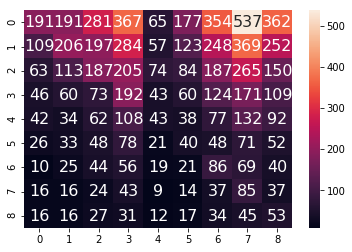

In [81]:
evaluate(train.Item_Outlet_Sales_class, dt.predict(train[features]))

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 35 columns):
Item_Identifier           8523 non-null object
Item_MRP                  8523 non-null float64
Item_Outlet_Sales         8523 non-null float64
Item_Visibility           8523 non-null float64
Item_Weight               8523 non-null float64
Outlet_Identifier         8523 non-null object
Outlet_Years              8523 non-null int64
Item_Fat_Content_0        8523 non-null uint8
Item_Fat_Content_1        8523 non-null uint8
Item_Fat_Content_2        8523 non-null uint8
Outlet_Location_Type_0    8523 non-null uint8
Outlet_Location_Type_1    8523 non-null uint8
Outlet_Location_Type_2    8523 non-null uint8
Outlet_Size_0             8523 non-null uint8
Outlet_Size_1             8523 non-null uint8
Outlet_Size_2             8523 non-null uint8
Outlet_Type_0             8523 non-null uint8
Outlet_Type_1             8523 non-null uint8
Outlet_Type_2             8523 non-null uint8
Outlet_Ty

In [82]:
train.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,predicted_sales,Item_Outlet_Sales_int
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,140.992782,2181.288914,0.070471,12.846524,15.168133,0.459697,0.187610,0.352693,0.280183,0.326763,...,0.108647,0.108882,0.061950,0.109703,0.109117,0.108999,0.109117,0.109117,2181.288914,2180.786577
std,62.275067,1706.499616,0.048730,4.226194,8.371760,0.498402,0.390423,0.477836,0.449115,0.469057,...,0.311214,0.311509,0.241079,0.312538,0.311804,0.311656,0.311804,0.311804,1280.985891,1706.497259
min,31.290000,33.290000,0.003575,4.555000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1415.802481,33.000000
25%,93.826500,834.247400,0.033085,9.310000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1329.150989,833.500000
50%,143.012800,1794.331000,0.062517,12.792854,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2179.971791,1794.000000
75%,185.643700,3101.296400,0.094585,16.000000,26.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3057.975748,3101.000000
max,266.888400,13086.964800,0.328391,21.350000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5654.136796,13086.000000
